# ClearWater-Riverine Demo 2: Coupling Transport to Water Quality Reactions with ClearWater-Modules

**Objective**: Demonstrate a more complex scenario of coupled transport and reaction models in Sumwere Creek, using the [ClearWater-modules](https://github.com/EcohydrologyTeam/ClearWater-modules) to simulate heat exchange with the atmosphere.

This second notebook builds on the introduction to using [ClearWater-riverine](https://github.com/EcohydrologyTeam/ClearWater-riverine) provided in demo notebook 1.

## Background 
This notebook couples Clearwater-riverine (transport) with Clearwater-modules (reactions) - specifically, the Temperature Simulation Model (TSM). The Temperature Simulation Module (TSM) is an essential component of ClearWater (Corps Library for Environmental Analysis and Restoration of Watersheds). TSM plays a crucial role in simulating and predicting water temperature within aquatic ecosystems. TSM utilizes a comprehensive energy balance approach to account for various factors contributing to heat inputs and outputs in the water environment. It considers both external forcing functions and heat exchanges occurring at the water surface and the sediment-water interface. The primary contributors to heat exchange at the water surface include shortwave solar radiation, longwave atmospheric radiation, heat conduction from the atmosphere to the water, and direct heat inputs. Conversely, the primary factors that remove heat from the system are longwave radiation emitted by the water, evaporation, and heat conduction from the water to the atmosphere. 
The core principle behind TSM is the application of the laws of conservation of energy to compute water temperature. This means that the change in heat content of the water is directly related to changes in temperature, which, in turn, are influenced by various heat flux components. The specific heat of water is employed to establish this relationship. Each term of the heat flux equation can be calculated based on the input provided by the user, allowing for flexibility in modeling different environmental conditions

## Example Case Study

This example shows how to run Clearwater Riverine coupled with Clearwater Modules in a fictional location, "Sumwere Creek" (shown below). The flow field for Sumwere Creek comes from a HEC-RAS 2D model, which has a domain of 2x2 km and a base mesh cell size of 100x100 meters. 

![image.png](../docs/imgs/SumwereCreek_coarse.png)

The upstream boundary for Sumwere Creek is at the top left of the model domain, flowing into the domain at a constant 3 cms. At the first bend in the creek, there is an additional boundary representing a spring-fed tributary to the creek (1 cms). Further downstream, there is a meander in the stream forming a slow-flowing oxbow lake. There is another boundary flowing into that oxbow lake, representing a powerplant discharge (0.5 cms). 

The downstream boundary is a constant stage set at 20.75. The upstream inflows have a water temperature of 15 degrees C; the spring-fed creek has constant inflows of 5 C, and the powerplant is steady at 20 C with periodic higher temperature (25 C) discharges in a downstream meander.  

We simulate this scenario over the course of two full days, using meteorological parameters from Arizona (extreme temperature swings between night and day) to help show off the impacts of TSM.

### Data Availability
All data required run this notebook is available at this [Google Drive](https://drive.google.com/drive/folders/19uCjAJPZh4g6r1ZWzk1D_B8jZGluSc4N?usp=drive_link). 
This notebook will use the `sumwere_creek_coarse_p48` model. Please download that entire folder and place it in the `data_temp` folder of this repository to run the rest of the notebook. 

Alternatively, if you would like to run a different version of the model (see the [ReadMe](https://docs.google.com/document/d/1FKjrTZHUYmYxo0mgn72dOezHtq-CFR86rQ1ObD1ZY0c/edit) for details), download that folder, place it in the `data_temp` folder. You may need to adjust path names in the notebook accordingly.

## Model Set-Up
### General Imports

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
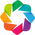

In [1]:
from pathlib import Path
import logging
import numpy as np
import pandas as pd
import xarray as xr
import holoviews as hv
import geoviews as gv
# from holoviews import opts
import panel as pn
hv.extension("bokeh")
import warnings

from shared import process_meteo_data
from shared import setup_function_logger

In [2]:
np.seterr(divide='ignore', invalid='ignore')
warnings.filterwarnings('ignore')

### Import ClearWater-riverine
These steps require first completing **[Installation](https://github.com/EcohydrologyTeam/ClearWater-riverine?tab=readme-ov-file#installation)** of a [conda](https://conda.io/docs/) virtual environment customized for the ClearWater-riverine library.

In [3]:
# Find project directory (i.e. the parent to `/examples` directory for this notebook)
project_path = Path.cwd().parent
project_path

WindowsPath('C:/Users/sjordan/OneDrive - LimnoTech/Documents/GitHub/clearwater-riverine')

In [4]:
# Your source directory should be: 
src_path = project_path / 'src'
src_path

WindowsPath('C:/Users/sjordan/OneDrive - LimnoTech/Documents/GitHub/clearwater-riverine/src')

Next, we'll need to import Clearwater Riverine. While the package is still under development, the easiest way to do this is to use the [`conda develop`](https://docs.conda.io/projects/conda-build/en/latest/resources/commands/conda-develop.html) command in the console or terminal like this, replacing the `'/path/to/module/src'` with your specific path to the source directory. In other words:
- Copy from the output of `src_path` from the cell above, and 
- Paste it after `!conda develop` in the cell below (replacing the previous user's path). 

NOTE: If your path has any blank spaces, you must enclose the path with quotes.

In [5]:
!conda develop '/Users/aaufdenkampe/Documents/Python/ClearWater-riverine/src'

path exists, skipping C:\Users\sjordan\OneDrive - LimnoTech\Documents\GitHub\clearwater-riverine\examples\'\Users\aaufdenkampe\Documents\Python\ClearWater-riverine\src'
completed operation for: C:\Users\sjordan\OneDrive - LimnoTech\Documents\GitHub\clearwater-riverine\examples\'\Users\aaufdenkampe\Documents\Python\ClearWater-riverine\src'


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
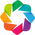

In [6]:
import clearwater_riverine as cwr

### Import ClearWater-Modules

We will also need to install Clearwater Modules' `Energy Budget` module. While this package is also still under development, the best way to install is with `conda develop`. You will need to clone the [ClearWater Modules](https://github.com/EcohydrologyTeam/ClearWater-modules) repository. Then, use conda develop pointing to the path of your `clearwater-modules` folder like below.

NOTE: You will need to find this path yourself. Remember that if your path has any blank spaces, you must enclose the path with quotes.

In [7]:
!conda develop '/Users/aaufdenkampe/Documents/Python/ClearWater-modules/src'

path exists, skipping C:\Users\sjordan\OneDrive - LimnoTech\Documents\GitHub\clearwater-riverine\examples\'\Users\aaufdenkampe\Documents\Python\ClearWater-modules\src'
completed operation for: C:\Users\sjordan\OneDrive - LimnoTech\Documents\GitHub\clearwater-riverine\examples\'\Users\aaufdenkampe\Documents\Python\ClearWater-modules\src'


You now need to restart the Python kernel for this notebook, if the path didn't already exist.

In [8]:
from clearwater_modules.tsm.model import EnergyBudget

## Instantiate Models
### Clearwater-Riverine

Ensure that you have followed the instructions in the Data Availability Section, and that you have all files downloaded from the [Google Drive](https://drive.google.com/drive/folders/19uCjAJPZh4g6r1ZWzk1D_B8jZGluSc4N?usp=drive_link) for `sumwere_creek_coarse_p48` and saved/unzipped to your local directory `examples/data_temp`. For a more detailed explanation of all the steps in this process, please see [01_getting_started_riverine.ipynb](./01_getting_started_riverine.ipynb).

This example sets up the model using a config file.

In [9]:
model_name = 'sumwere_creek_coarse_p48'

In [10]:
# required for riverine
test_case_path = project_path / 'examples/data_temp' / model_name
riverine_config = test_case_path / 'demo_config.yml'

# requierd information for modules
wetted_surface_area_path = test_case_path / "wetted_surface_area.zarr"
q_solar_path = test_case_path / 'cwr_boundary_conditions_q_solar_p28.csv'
air_temp_path = test_case_path / 'cwr_boundary_conditions_TairC_p28.csv'

In [11]:
start_index = int(8*60*(60/30))  # start at 8:00 am on the first day of the simulation (30 second model)
end_index = start_index + int(8*60*(60/30))  # end 8 hours later (30 second model)

In [12]:
%%time
transport_model = cwr.ClearwaterRiverine(
    config_filepath = riverine_config,
    verbose=True,
    datetime_range= (start_index, end_index)
)

Populating Model Mesh...
'Cell Hydraulic Depth' not found in hdf file; skip reading it. 
'Cell Velocity - Velocity X' not found in hdf file; skip reading it. 
'Cell Velocity - Velocity Y' not found in hdf file; skip reading it. 
Cell velocities X and Y not found in hdf file; skip calculating velocity magnitude
Calculating Required Parameters...
CPU times: total: 406 ms
Wall time: 451 ms


The Clearwater Riverine currently has the cell surface area, not the *wetted* cell surface area, as required for TSM. Ultimately, we will work on incorporating this calculation into Clearwater Riverine; however, for the sake of this example, we have the wetted surface areas saved in a zarr. 

In [13]:
wetted_sa = xr.open_zarr(wetted_surface_area_path)
wetted_sa = wetted_sa.compute()

In [14]:
wetted_sa_subset = wetted_sa.isel(time=slice(start_index, end_index+1))

In [15]:
transport_model.mesh['wetted_surface_area'] = xr.DataArray(
    wetted_sa_subset['wetted_surface_area'].values,
    dims=('time', 'nface')
)

In [16]:
transport_model.mesh

<xarray.Dataset>
Dimensions:                 (node: 549, time: 961, nface: 444, nmax_face: 8,
                             nedge: 915, 2: 2)
Coordinates:
    node_x                  (node) float64 5.004e+05 5.005e+05 ... 5.024e+05
    node_y                  (node) float64 2.381e+03 2.376e+03 ... 500.0 500.0
  * time                    (time) datetime64[ns] 2022-05-13T08:00:00 ... 202...
    face_x                  (nface) float64 5.005e+05 5.006e+05 ... 5.024e+05
    face_y                  (nface) float64 2.45e+03 2.45e+03 ... 500.0 564.4
Dimensions without coordinates: node, nface, nmax_face, nedge, 2
Data variables: (12/19)
    mesh2d                  int32 0
    face_nodes              (nface, nmax_face) int32 0 1 2 3 545 ... -1 -1 -1 -1
    edge_nodes              (nedge, 2) int32 0 1 1 2 2 3 ... 43 547 418 548 519
    edge_face_connectivity  (nedge, 2) int32 0 207 0 208 0 ... 194 442 329 443
    edges_face1             (nedge) int32 0 0 0 0 207 207 ... 366 0 19 194 329
    edges_face2             (nedge) int32 207 208 1 367 208 ... 440 441 442 443
    ...                      ...
    edge_vertical_area      (time, nedge) float32 0.0 0.0 0.0 ... 0.0 0.0 27.96
    face_to_face_dist       (nedge) float64 143.2 161.4 100.0 ... 50.0 55.01
    coeff_to_diffusion      (time, nedge) float64 0.0 0.0 0.0 ... 0.0 0.05082
    dt                      (time) float64 30.0 30.0 30.0 30.0 ... 30.0 30.0 nan
    temperature             (time, nface) float64 15.0 15.0 15.0 ... nan nan nan
    wetted_surface_area     (time, nface) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/13)
    Conventions:                       CF-1.8 UGRID-1.0 Deltares-0.10
    diffusion_coefficient:             0.1
    volume_calculation_required:       False
    face_area_calculation_required:    False
    face_area_elevation_info:          Empty DataFrame\nColumns: []\nIndex: []
    face_area_elevation_values:        Empty DataFrame\nColumns: []\nIndex: []
    ...                                ...
    face_cell_indexes_df:              Empty DataFrame\nColumns: []\nIndex: []
    face_volume_elevation_info:        Empty DataFrame\nColumns: []\nIndex: []
    face_volume_elevation_values:      Empty DataFrame\nColumns: []\nIndex: []
    boundary_data:                     Empty DataFrame\nColumns: []\nIndex: []
    units:                             Metric
    nreal:                             366

### Clearwater-Modules

#### Initial State Values
The initial state values are `water_temp_c`, `volume`, and `surface_area` come from Clearwater-riverine mesh at the first timestep.

In [17]:
# Provide xr.data array values for initial state values
initial_state_values = {
    'water_temp_c': transport_model.mesh['temperature'].isel(
        time=0,
        nface=slice(0, transport_model.mesh.nreal+1)
    ),
    'volume': transport_model.mesh['volume'].isel(
        time=0,
        nface=slice(0, transport_model.mesh.nreal+1)
    ),
    'surface_area': transport_model.mesh['wetted_surface_area'].isel(
        time=0,
        nface=slice(0, transport_model.mesh.nreal + 1)
    ),
}

#### Meteorological Parameters
The meteorological parameters that we'll be adjusting for this model are `q_solar` and `air_temp_c`. In this example, `q_solar` and `air_temp_c` are pulled from meteorological stations in Arizona. 
We will need to interpolate these datasets to our model timestep. First, we create a time index from our transport model's xarray time coordinate to interpolate our data to:

In [18]:
# Create a pandas datetime index from the transport model
xarray_time_index = pd.DatetimeIndex(
    transport_model.mesh.time.values
)

Next, interpolate the meteorological station data to the same timestep as our model. To simplify this process in this example, we leverage the `process_meteo_data` function in the shared modules within this example folder.

In [19]:
# Read CSV data into pandas dataframes
q_solar = process_meteo_data(
    q_solar_path,
    xarray_time_index,
    'q_Solar'
)

air_temp_c = process_meteo_data(
    air_temp_path,
    xarray_time_index,
    'TairC'
)

air_temp_c['air_temp_c'] = (air_temp_c.tairc - 32)* (5/9)

Finally, we can create dictionaries containing all meteorological data and the initial conditions. These will be used as inputs to Clearwater Modules. 

In [20]:
# process dataframes for ClearWater 
q_solar_array = q_solar.q_solar.to_numpy()
air_temp_array = air_temp_c.air_temp_c.to_numpy()

# for each individual timestep
all_meteo_params = {
    'q_solar': q_solar_array,
    'air_temp_c': air_temp_array,
}

# for initial conditions
initial_meteo_params = {
    'air_temp_c': air_temp_array[0],
    'q_solar': q_solar_array[0],
}

#### Temperature Parameters
Users can also optionally define any `temp_parameters` that should be different than the default.

In this case, our model timestep `dt` is equal to 30 seconds. However, by default in Clearwater-Modules, it is 1 day. We will therefore need to define `dt`:

In [21]:
temp_parameters = {
    'dt': 30 / 86400  # 30 seconds in days
}

#### Instantiate Clearwater Modules
We instantiate Clearwater Modules with the following:
* `time_steps` (required): the number of timesteps to run. 
* `initial_state_values` (required): our initial conditions of water temperature, cell volumes, and cell surface areas.
* `time_dim` (optional): the model timestep
* `meteo_parameters` (optional): intitial meteorological parameters. If not provided, all meteo parameters will fall to default values.
* `track_dynamic_variables` (optional): boolean indicating whether or not the user wants to track all intermediate information used in the calculations. We set this to `False` to save on memory.
* `use_sed_temp` (optional): boolean indicating whether to use the sediment temperature in TSM calculations. We opt to turn this off for simplicity.
* `updateable_static_variables` (optional): by default, the meteorological variables are static in TSM. If we want these to update over time, we must provide a list of variables that we want to be updateable as input when instantiating the model. 

In [22]:
# Instantiate the same number of timesteps for Modules as we have in Clearwater Riverine
time_steps = len(transport_model.mesh.time)

In [23]:
reaction_model = EnergyBudget(
    time_steps=time_steps,
    initial_state_values=initial_state_values,
    updateable_static_variables=['air_temp_c', 'q_solar'],
    meteo_parameters= initial_meteo_params,
    temp_parameters=temp_parameters,
    use_sed_temp=False,
    track_dynamic_variables=False, 
    time_dim='seconds'
    )


Initializing from dicts...
Model initialized from input dicts successfully!.


## Couple Models

### Set-Up Coupling Function
Now that we have instantiated both our `Clearwater-Riverine` and `Clearwater-Modules` models, we can couple them. We will do so using the `run_n_timesteps` function, which runs `n` number of timesteps, with the following process:
1. Optionally sets up a logger. 
2. Top of the timestep: Increment the transport model (Riverine). After the first timestep, information from Clearwater-Modules will be passed back into Clearwater-Riverine.
3. Create inputs for Clearwater Modules with outputs from Clearwater Riverine and meteorological data
4. Bottom of the tiemestep: Increment the reaction model (Modules).
5. Create inputs for Clearwater Riverine with outputs from Clearwater Modules.

The inputs for the function are as follows:
* `time_steps`: The number of timesteps to run.
* `reaction`: The Clearwater-Modules model (instantiated above)
* `transport`: The Clearwater-Riverine model (instantiated above)
* `meteo_params`: Meteorological inputs (defined above)
* `riverine_to_modules`: A list of inputs to modules for the specified model
* `modules_to_riverine`: A list of inputs from riverine back to modules.
* `modules_to_riverine_matching`: A dictionary mapping the names of clearwater modules variable names (keys) to clearwater riverine module names (values). Only needed where the values are different.
* `concentration_update`: this will be None on the first timestep; it will get updated by Clearwater Modules.
* `logging`: Boolean to log (True) or not (False). False by default.
* `log_file_name`: Name of log file. `log` by default.
* `logging_interval`: Number of timesteps that should pass between logs. Selecting a small number will slow down the model.


In [24]:
def run_n_timesteps(
    time_steps: int,
    reaction: EnergyBudget,
    transport: cwr.ClearwaterRiverine,
    meteo_params: dict,
    riverine_to_modules: list,
    modules_to_riverine: list,
    modules_to_riverine_matching={},
    concentration_update=None,
    logging=False,
    log_file_name='log',
    logging_interval=5000,
):
    """Function to couple Clearwater Riverine and Modules for n timesteps."""

    # 1. Set up logger
    if logging:
        logger = setup_function_logger(f'{log_file_name}')

    # Loop through all timesteps
    for i in range(1, time_steps):
        if logging:
            if i % logging_interval == 0:
                status = {
                    'timesteps': i,
                    'cwr': transport.mesh.nbytes * 1e-9,
                    'cwm': reaction.dataset.nbytes*1e-9,
                }
                logger.debug(status)

        # 2. Top of timestep: Update transport model
        transport.update(concentration_update)

        # 3. Update state values
        # 3.1 Update using outputs from Clearwater Riverine
        updated_state_values = {}
        for state_variable_name in riverine_to_modules:
            if state_variable_name in modules_to_riverine_matching:
                riverine_key = modules_to_riverine_matching[state_variable_name]
            else:
                riverine_key = state_variable_name
            updated_state_values[state_variable_name] = transport.mesh[riverine_key].isel(
                    time=i,
                    nface=slice(0, transport.mesh.nreal + 1)
            )

        # 3.2 Update meteorological inputs
        for meteo_param in meteo_params.keys():
            updated_state_values[meteo_param] = xr.full_like(
                updated_state_values[riverine_to_modules[0]],
                meteo_params[meteo_param][i]
            )

        # 4. Bottom of timestep: update energy budget (TSM)
        reaction.increment_timestep(updated_state_values)

        # 5. Prepare data for input back into Riverine
        concentration_update = {}
        for variable in modules_to_riverine:
            if variable in modules_to_riverine_matching:
                riverine_key = modules_to_riverine_matching[variable]
            else:
                riverine_key = variable

            reaction.dataset[variable] = reaction.dataset[variable].where(
                ~np.isinf(reaction.dataset[variable]),
                transport.mesh[riverine_key].isel(
                    nface=slice(0, transport.mesh.nreal+1),
                    time=i
                )
            )
            reaction.dataset[variable] = reaction.dataset[variable].fillna(
                transport.mesh[riverine_key].isel(
                    nface=slice(0, transport.mesh.nreal+1),
                    time=i
                )
            )
            concentration_update[riverine_key]: reaction[variable].isel(seconds=i)


### Run the Coupling Function
Earlier in the notebook, we set up most of what we need to couple the models. However, we still need to define a few key inputs that help pass information back and forth between Clearwater Riverine with the following input parameters:
* `riverine_to_modules`: We are passing water temperature, surface area, and volume from Riverine to Modules.
* `modules_to_riverine`: We are passing water temperature from Modules back to Riverine.
* `modules_to_riverine_matching`: Water temperature and surface area are named differently in the two models. We'll need to use this dictionary to show that link. 

In [25]:
# Define the names of variables being passed from Riverine to Modules
riverine_to_modules = [f.name for f in reaction_model.state_variables]

modules_to_riverine = ['water_temp_c']

modules_to_riverine_matching = {
    'water_temp_c': 'temperature',
    'surface_area': 'wetted_surface_area'
}

Now we have all the inputs required to run the function! 

Let's run it for all timesteps below:

In [26]:
%%time
run_n_timesteps(
    time_steps=time_steps,
    reaction=reaction_model,
    transport=transport_model,
    meteo_params=all_meteo_params,
    riverine_to_modules=riverine_to_modules,
    modules_to_riverine=modules_to_riverine,
    modules_to_riverine_matching=modules_to_riverine_matching,
)

CPU times: total: 1min 26s
Wall time: 1min 31s


## Plot Results

### Built-In Functions
Use the built-in plotting function:

In [27]:
transport_model.plot(
    crs='EPSG:26916',
    clim=(5, 26)
)

:DynamicMap   [datetime]
   :Overlay
      .Polygons.I :Polygons   [Longitude,Latitude]   (temperature,cell)
      .WMTS.I     :WMTS   [Longitude,Latitude]

### Build Panel Apps

Clearwater Riverine has xarray and geodataframe data that can be used to make custom plots! Here are a few examples:

#### Interactive Timeseries Plotting
This is an exmaple of an interactive map that allows you to click on a single cell and see the timeseries for that cell:

In [28]:
from clearwater_riverine.variables import NUMBER_OF_REAL_CELLS

In [29]:
# create inputs for panel app
ds = transport_model.mesh
gdf = transport_model.gdf
time_index = 60
mn_val = 4
mval = 25
date_value = ds.time.isel(time=time_index).values

Start by creating a base map of a plan view of Sumwere Creek using the `geoviews` library. Including the `hover` and `tap` tools allows users to hover over the plot to see values and turns on the ability to use the tap stream that allows users to click on a cell and receive feedback from that tap. 

In [30]:
ras_sub_df = gdf[(gdf.datetime == date_value) & (gdf.temperature != 0)]
units = ds['temperature'].Units
ras_map = gv.Polygons(
    ras_sub_df,
    vdims=['temperature', 'cell']).opts(
        height = 400,
        width = 400,
        color='Temperature',
        cmap='RdYlBu_r',
        line_width = 0.1,
        tools = ['hover', 'tap'],
        clabel = f"Temperature ({units})",
        xaxis=None,
        yaxis=None,
)

The cell below defines the tap stream and initializes an empty list of plots to display. 

In [31]:
tap_stream = hv.streams.Tap(source=ras_map, x=None, y=None)
plots = []

The `tap_plot` function identifies which cell has been clicked and generates a timeseries plot for that cell.

In [32]:
def tap_plot(x, y):
    # filter data
    clicked_data = ras_sub_df.cx[x:x, y:y]
    if x != None and y != None:
        # identify cell number and pull concentration timeseries for that cell
        cell = clicked_data['cell'].iloc[0]
        cs = ds.temperature.isel(nface=cell, time=slice(0, time_steps))

        # Create timeseries plot
        curve = hv.Curve(
            cs,
        ).opts(
            title=f'Time series',
            height=400,
            width=400,
            line_width=5,
            fontsize= {'title': 18, 'labels': 16, 'xticks': 12, 'yticks': 12},
            ylabel= 'Water Temperature (C)'
        )

        # Append to list of plots (allows multiple lines to appear at the same time)
        plots.append(curve)
        # Return an overlay of all the plots
        return hv.Overlay(plots).opts(legend_position='right')
    else:
        # Create an empty timeseries plot telling users to click on a cell to generate a timeseries
        xs = np.linspace(-5,5,100)
        empty_curve = hv.Curve((xs,-(xs-2)**2)).opts(
            title=f'Time series',
            line_color='white',
            height=400, 
            width=400,
            xaxis=None,
            yaxis=None,
        )* hv.Text(0, -20, "Please click a cell on the map to display a timeseries.")
        return empty_curve

# Create Dynamic Map that references the tap stream.
tap_dmap = hv.DynamicMap(tap_plot, streams=[tap_stream])

The following function and button allows users to clear all timeseries plots if they wish to start fresh:

In [33]:
def reset_tap_stream(event):
    global plots
    tap_stream.event(x=None, y=None)
    plots = []
    
button = pn.widgets.Button(name='Reset', button_type='primary')
button.on_click(reset_tap_stream)

Watcher(inst=Button(button_type='primary', name='Reset'), cls=<class 'panel.widgets.button.Button'>, fn=<function reset_tap_stream at 0x0000018B029BEA20>, mode='args', onlychanged=False, parameter_names=('clicks',), what='value', queued=False, precedence=0)

Now display the plot:

In [34]:
layout = pn.Row(
    ras_map,
    tap_dmap.opts(
        hv.opts.Curve(framewise=True, yaxis='right'),
       ),
    button
    )
layout.servable()

Row
    [0] HoloViews(Polygons, height=400, sizing_mode='fixed', width=400)
    [1] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=400)
    [2] Button(button_type='primary', name='Reset')

#### Dynamic Map Visualization
Make a plot with a scrubber bar that shows a map over time:

In [39]:
ds = transport_model.mesh
gdf = transport_model.gdf
import hvplot.pandas 

In [40]:
# eliminate cells without any temperature
gdf_sub = gdf[gdf.temperature != 0]
gdf_subset = gdf_sub[(gdf_sub['datetime'] > '2022-05-13 08:00:00')]

In [41]:
plot_to_save = gdf_subset.hvplot(
    geo=True,
    groupby="datetime",
    # z = 'concentration',
    c = 'temperature', # minute_gdf_subset.concentration,
    clim=(4, 25),
    cmap='RdYlBu_r',
    clabel='Water Temperature (C)',
    line_width = 0.1,
    height=400,
    width=500,
    widget_location='bottom',
    line_color='white',
    
)

In [42]:
plot_to_save

Column
    [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', widget_location='bottom', width=500)
    [1] WidgetBox(align=('center', 'end'))
        [0] DiscreteSlider(margin=(20, 20, 20, 20), name='datetime', options=OrderedDict([('2022-05-13 ...]), value=numpy.datetime64('2022-05-..., width=250)